In [27]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
%matplotlib inline

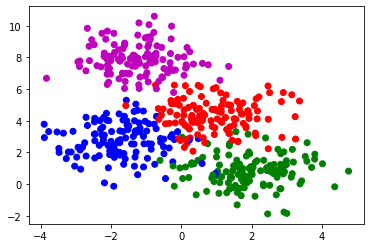

In [39]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
#造数据
centers=4
# 生成800个维样本点集合，中心点4个
data,y=ds.make_blobs(n_samples=500,centers=centers,random_state=0)
#函数作用生成各向同性的高斯斑点以进行聚类，返回data数组:元素为x和y轴的坐标，长度为n_samples个，y数组长度为n_samples，内容是centers种类.
#如样本数为10，center=2，y可能等于[0,1,0,1,0,1,0,1,0,1]
#其他参数：
#n_samples：样本总数（会平均分配给簇，默认是100个）如果是数组，则序列中的每个元素表示每个簇的样本数。
#n_features：int，可选（默认值= 2）每个样本的特征数量

#centers：int或形状数组[n_centers，n_features]，可选（默认= None）要生成的中心数或固定的中心位置。
#如果n_samples是一个int且center为None，则将生成3个中心。 如果n_samples是数组类，则中心必须为None或长度等于n_samples长度的数组，元素是初始聚类中心坐标。



#原始数据分布
#在使用matplotliblib画图的时候经常会遇见中文或者是负号无法显示的情况，我们会添加下面两句话：
#pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。
cm = matplotlib.colors.ListedColormap(list('rgbm'))
plt.scatter(data[:,0],data[:,1],c=y,cmap=cm)
#cmap不设置也行，即随机参数，c为散点颜色
plt.show()

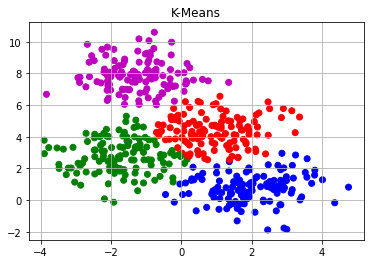

In [42]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=4)#指定聚类中心个数
#其他参数：KMeans(max_iter=最多迭代次数，init=初始聚类中心的初始化方法)一般不用更改，max_iter默认最大300
#algorithm: kmeans的实现算法，有：‘auto’, ‘full’, ‘elkan’, 其中 'full’表示用EM方式实现，模式是auto
y_pre = km.fit_predict(data)#model.fit_predict相当于两个动作的合并：model.fit（data）+model.predict（data），可以一次性得到聚类预测之后的标签，免去了中间过程
#计算簇中心以及为簇分配序号,即为每个data进行分类
plt.scatter(data[:,0],data[:,1],c=y_pre,cmap=cm)
plt.title('K-Means')
plt.grid()
plt.show()

### 重要属性
km.cluster_centers 查看聚类中心坐标

### 评价聚类算法性能指标：轮廓系数可以评价簇内稠密程度和簇外离散程度
    + a:样本与其他同在簇中样本的相似度，其实就是离所有簇中其他点的平均距离
    + b:样本与其他簇中样本的相似度，就是离该样本最近的簇（除了本簇）中所有点的平均距离
单个样本轮廓系数计算为
<center>$s=\frac{b-a}{max(a,b)}$

s属于（-1，1），为1表示样本与自己所在簇很相似，并且与其他样本不相似
轮廓系数也有缺点，对于凸型的类表现虚高

In [46]:
from sklearn.metrics import silhouette_score # 返回整个数据集轮廓系数均值
from sklearn.metrics import silhouette_samples  #返回每个样本的轮廓系数
silhouette_samples(data,y_pre)
silhouette_score(data,y_pre)

0.5010253066728394

# 实例
+ 基于轮廓系数选择k
+ 了解每个类的轮廓系数

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
%matplotlib inline

In [34]:
n_clusters=4

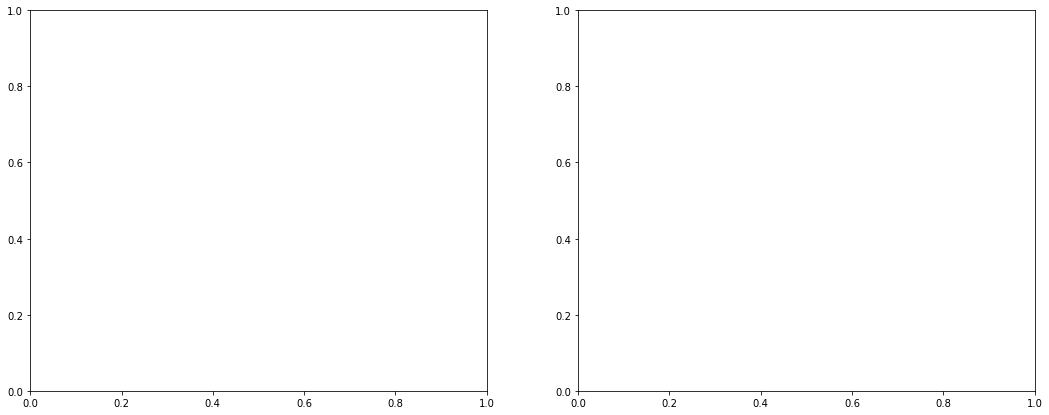

In [37]:
plt.figure(figsize=(18,7))
plt.subplot(121)
#第一个图，每个类的轮廓系数，各个类直接的轮廓系数对比
#第二个图，了解聚类完后图像分布
plt.xlim([-0.1,1])
plt.ylim([0,X.shape[0]+(n_clusters+1)*10])

plt.subplot(122)
plt.xlim([-0.1,1])
plt.show()
#略

## 对于非结构数据的矢量化
如图像声音等，本质上是一种降维
聚类，用聚心所带的信息覆盖簇内其他点的信息，这样，40个样本的40种取值，就被压缩成了四组取值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#对两个序列中的点进行距离匹配的函数
from sklearn.datasets import load_sample_image
# 导入图片所用的库


In [2]:
china=load_sample_image("china.jpg")
china.dtype #典型的图片类型

dtype('uint8')

In [3]:
china.shape
# 长*宽* 每个像素点有3个特征，3个特征决定一个颜色

(427, 640, 3)

In [4]:
china[0][0] # 3个点代表着一个颜色

array([174, 201, 231], dtype=uint8)

In [5]:
newimage=china.reshape((427*640),3)

In [6]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape
#去掉重复颜色
#96615种颜色

(96615, 3)

In [8]:
newimage

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

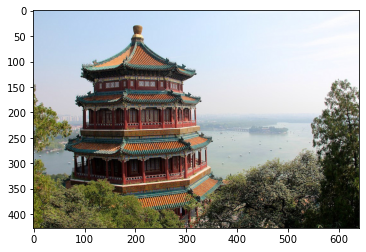

In [7]:
plt.figure()
plt.imshow(china) #导入三维数组形成的图片

In [10]:
# 试图将颜色压缩到64种，还不严重损耗图像质量，将9W种颜色聚类成64类，用64个簇的颜色去替代其他点颜色
# 但kmeans不接受三维数组，需要先进行预处理
#plt.imshow在浮点数表现非常优秀，故将颜色先压缩到0-1之间
china=np.array(china,dtype=np.float64)/china.max()

In [9]:
w,h,d=china.shape  # 保留原先结构
assert d==3 #特征一定要保留，我们不减少特征种类

In [8]:
kmeans=KMeans(n_clusters=64,random_state=0).fit(newimage)
kmeans.cluster_centers_ #簇的质心

In [10]:
kmeans.labels_  #64种簇

array([26, 26, 26, ..., 42, 43, 43])

In [11]:
# 接下来将簇中其他点全部辅助为质心点
for i in range(64):
    newimage[kmeans.labels_==i]=kmeans.cluster_centers_[i]

In [12]:
newimage=newimage.reshape(w,h,d) #还原维度
newimage.shape

(427, 640, 3)

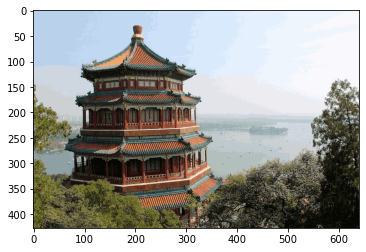

In [13]:
plt.figure()
plt.imshow(newimage) 